## Multiple Disease Prediction System - 2.) Diabetes

In [295]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [296]:
#Reading The Data Using Pandas Library (Data From A csv File Into A Pandas Dataframe)

data=pd.read_csv("/content/Diabetes.csv")

### Dataset Link:https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [297]:
#Check The Type Of Data

type(data)

pandas.core.frame.DataFrame

In [298]:
#Basic Information About The Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [299]:
#Renaming The Columns

data=data.rename(columns={"BloodPressure":"Blood Pressure","SkinThickness":"Skin Thickness","DiabetesPedigreeFunction":"Diabetes Pedigree Function"})

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [301]:
data.head()

Pregnancies  Glucose  Blood Pressure  Skin Thickness  Insulin   BMI  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   Diabetes Pedigree Function  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1

In [302]:
data.tail()

Pregnancies  Glucose  Blood Pressure  Skin Thickness  Insulin   BMI  \
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes Pedigree Function  Age  Outcome  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0

In [303]:
#To Get The Statistical Insight From The Dataset

data.describe().T

count        mean         std     min       25%  \
Pregnancies                 768.0    3.845052    3.369578   0.000   1.00000   
Glucose                     768.0  120.894531   31.972618   0.000  99.00000   
Blood Pressure              768.0   69.105469   19.355807   0.000  62.00000   
Skin Thickness              768.0   20.536458   15.952218   0.000   0.00000   
Insulin                     768.0   79.799479  115.244002   0.000   0.00000   
BMI                         768.0   31.992578    7.884160   0.000  27.30000   
Diabetes Pedigree Function  768.0    0.471876    0.331329   0.078   0.24375   
Age                         768.0   33.240885   11.760232  21.000  24.00000   
Outcome                     768.0    0.348958    0.476951   0.000   0.00000   

                                 50%        75%     max  
Pregnancies                   3.0000    6.00000   17.00  
Glucose                     117.0000  140.25000  199.00  
Blood Pressure               72.0000   80.00000  122.00  
Skin Thickness               23.0000   32.00000   99.00  
Insulin                      30.5000  127.25000  846.00  
BMI                          32.0000   36.60000   67.10  
Diabetes Pedigree Function    0.3725    0.62625    2.42  
Age                          29.0000   41.00000   81.00  
Outcome                       0.0000    1.00000    1.00

In [304]:
#Checking Missing Values In The Dataset

data.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

In [305]:
#To See How Many Outcome States Are There In The Dataset

data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

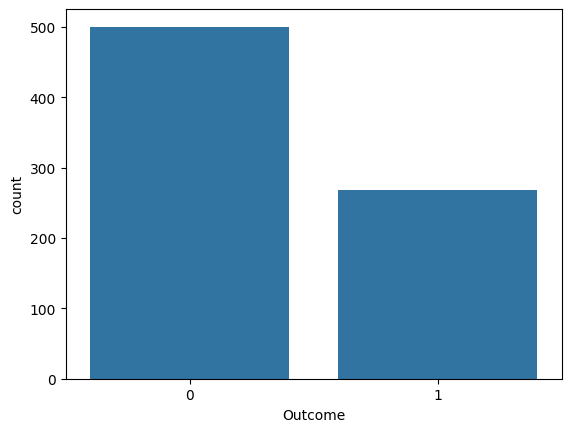

In [306]:
#Plotting The Count Plot Of Outcome

sns.countplot(x="Outcome",data=data)

0=Non Diabetic,
1=Diabetic

<ipython-input-307-ef74f2c27328>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Outcome"])


<Axes: xlabel='Outcome', ylabel='Density'>

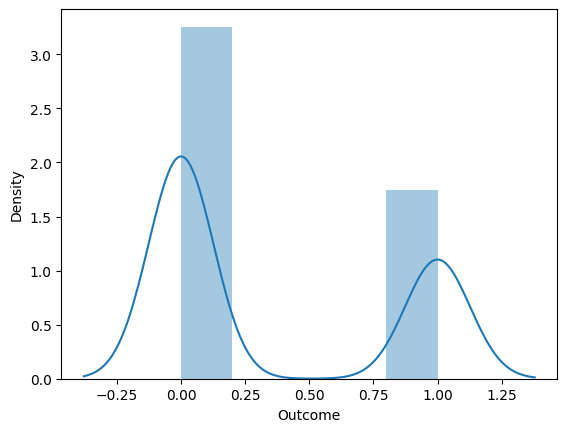

In [307]:
#Plotting The Distribution Plot Of Outcome

sns.distplot(data["Outcome"])

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'Blood Pressure'}>],
       [<Axes: title={'center': 'Skin Thickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Diabetes Pedigree Function'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

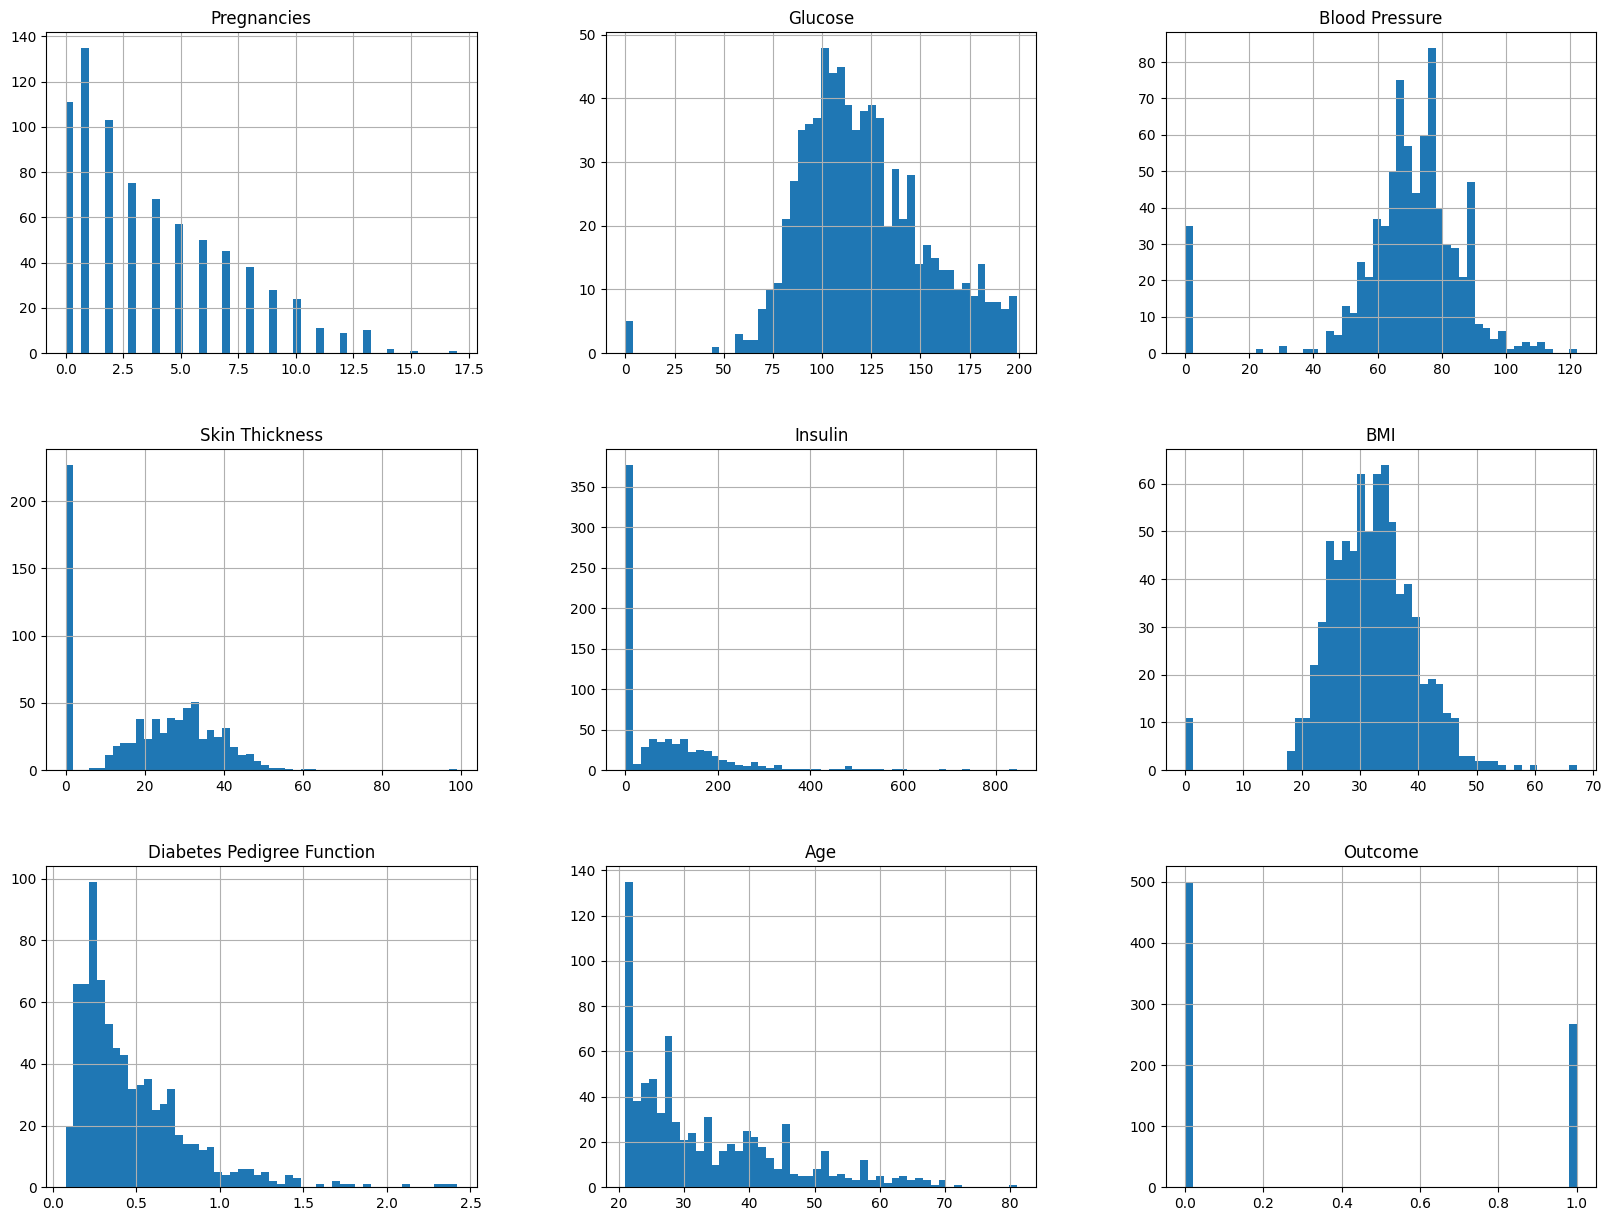

In [308]:
#Plotting The Histogram Of The Various Features

data.hist(bins=50,figsize=(20,15))

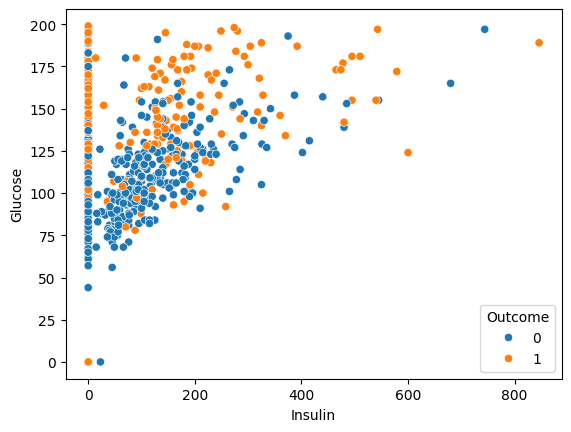

In [309]:
#Plotting The Scatterplot By Projecting Outcomes Based on Two Features Glucose And Insulin

sns.scatterplot(data=data,x="Insulin",y="Glucose",hue="Outcome")
plt.show()

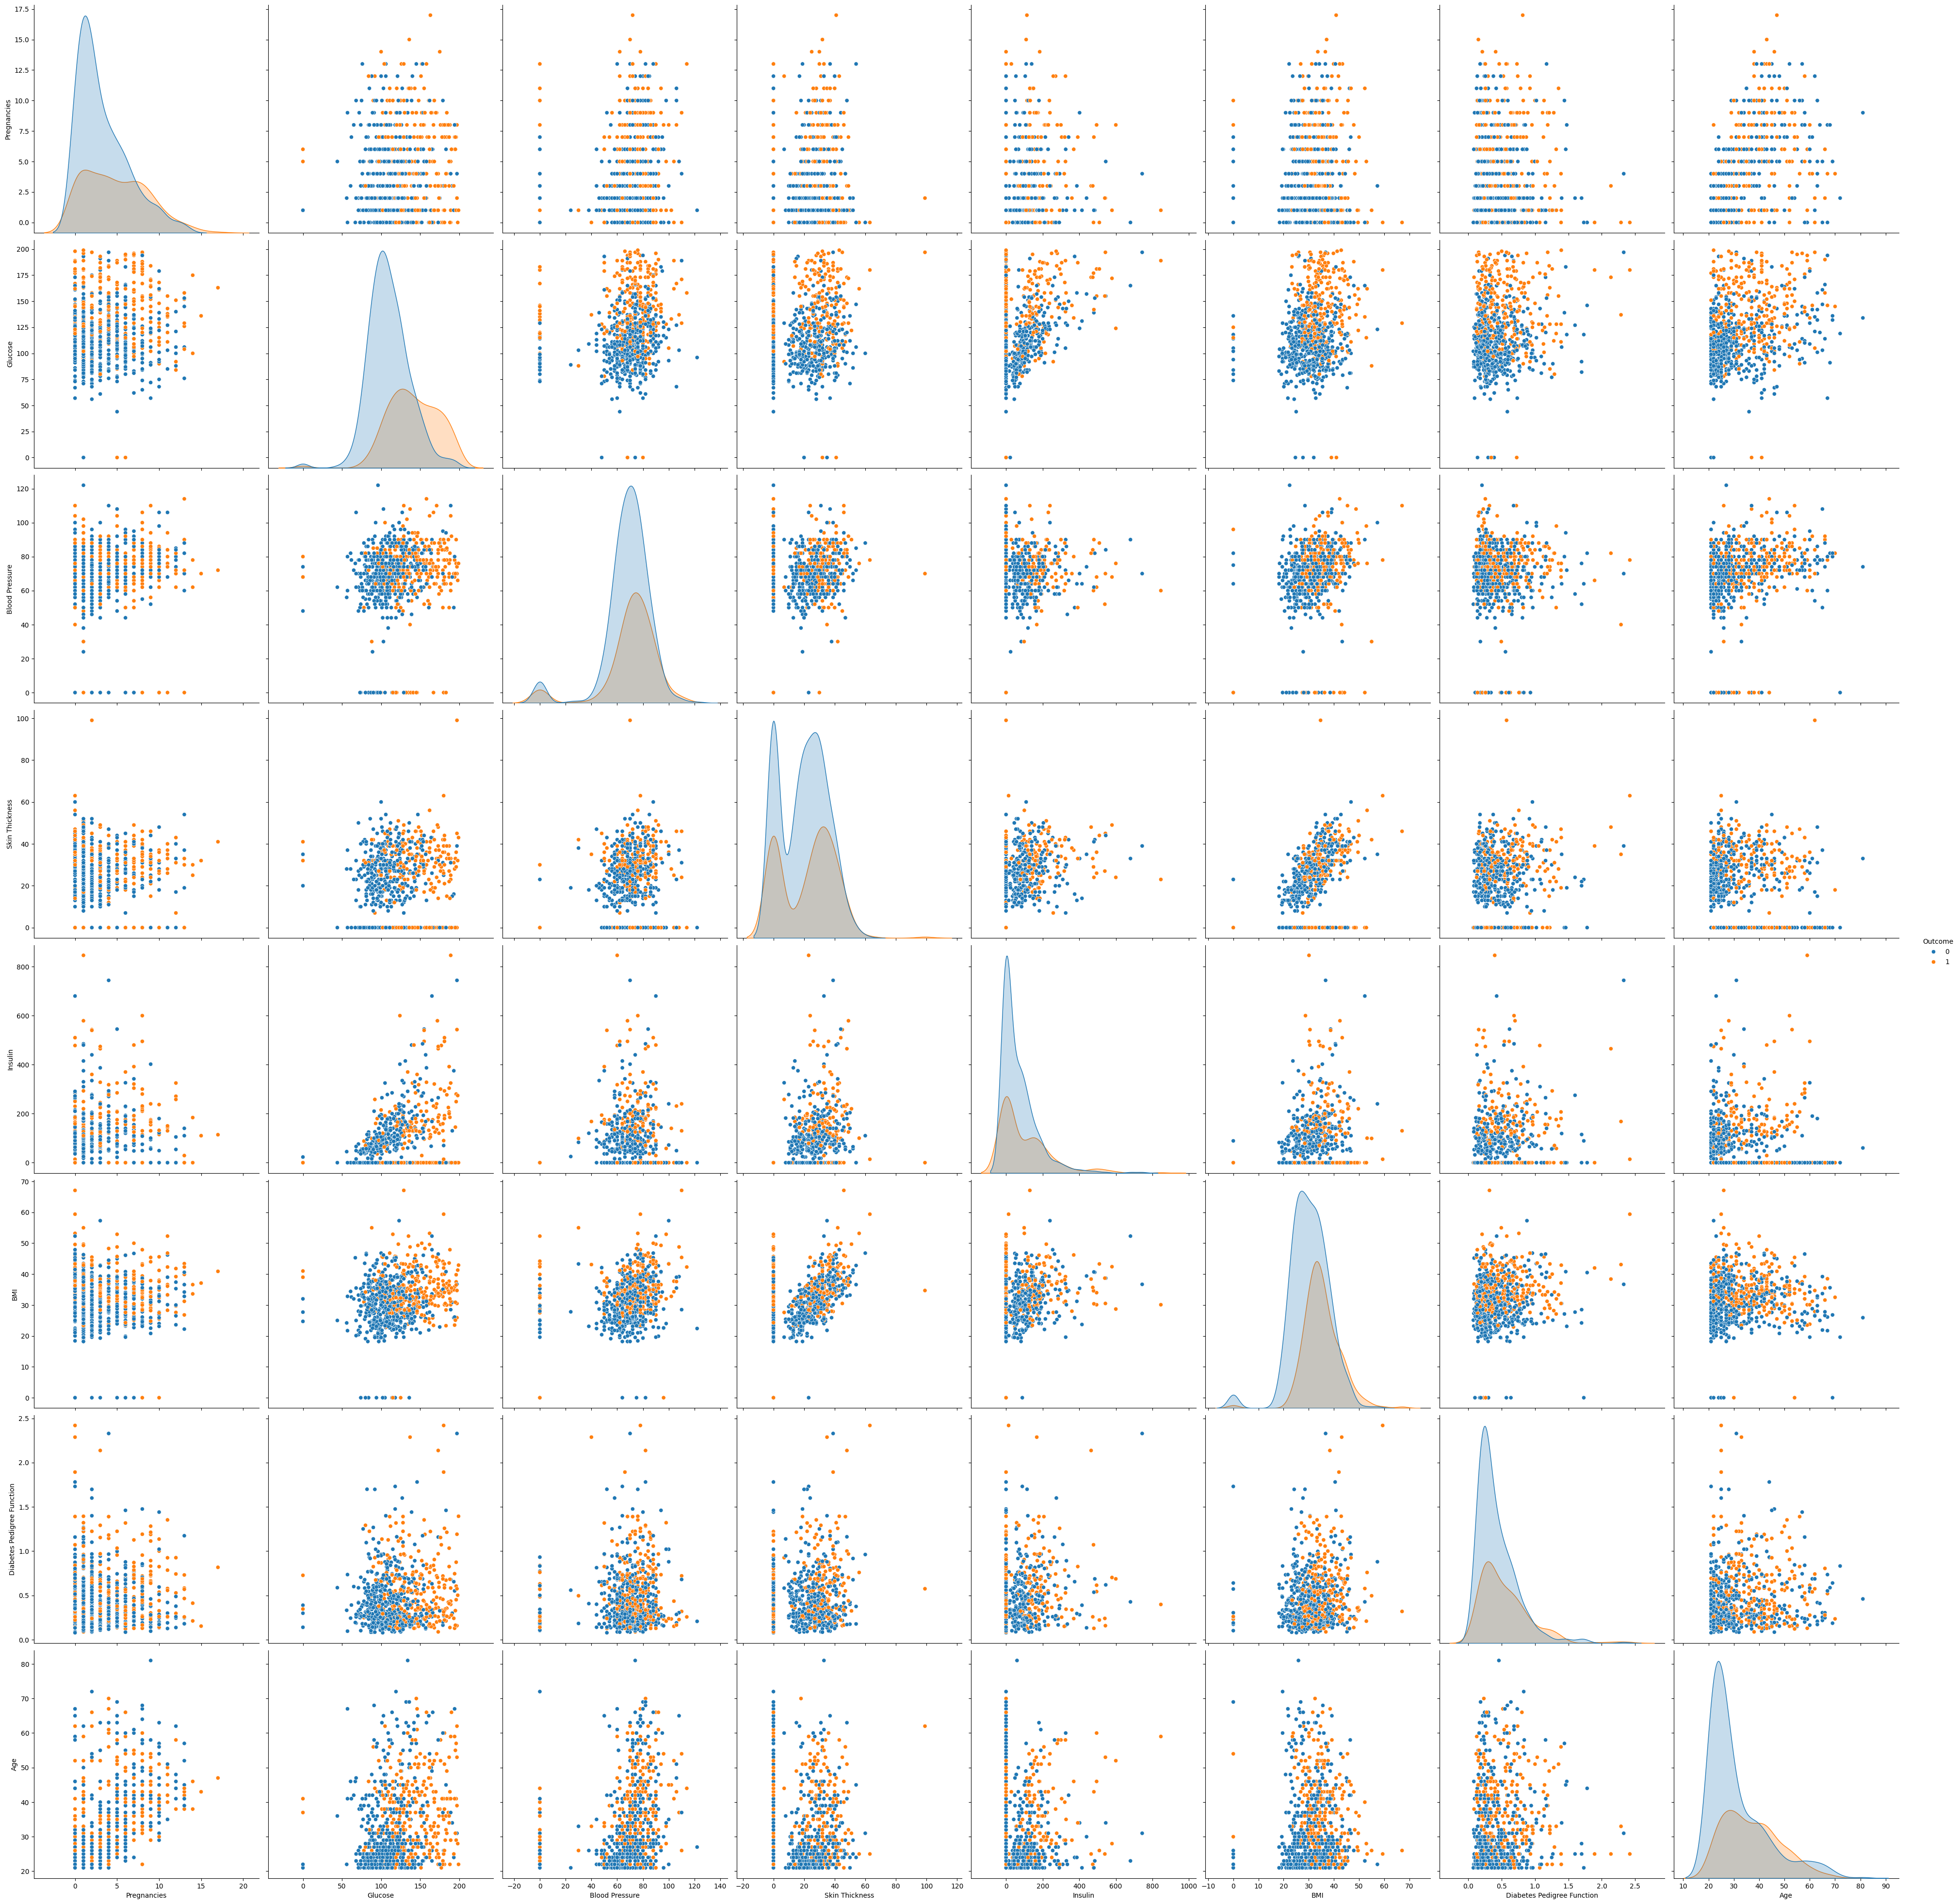

In [310]:
#Plotting The Pairplot Of Outcome

sns.pairplot(data=data,hue="Outcome",height=5)
plt.show()

In [311]:
#To Find Correlation Among The Columns In The Dataframe

corr_matrix=data.corr()
corr_matrix

Pregnancies   Glucose  Blood Pressure  \
Pregnancies                    1.000000  0.129459        0.141282   
Glucose                        0.129459  1.000000        0.152590   
Blood Pressure                 0.141282  0.152590        1.000000   
Skin Thickness                -0.081672  0.057328        0.207371   
Insulin                       -0.073535  0.331357        0.088933   
BMI                            0.017683  0.221071        0.281805   
Diabetes Pedigree Function    -0.033523  0.137337        0.041265   
Age                            0.544341  0.263514        0.239528   
Outcome                        0.221898  0.466581        0.065068   

                            Skin Thickness   Insulin       BMI  \
Pregnancies                      -0.081672 -0.073535  0.017683   
Glucose                           0.057328  0.331357  0.221071   
Blood Pressure                    0.207371  0.088933  0.281805   
Skin Thickness                    1.000000  0.436783  0.392573   
Insulin                           0.436783  1.000000  0.197859   
BMI                               0.392573  0.197859  1.000000   
Diabetes Pedigree Function        0.183928  0.185071  0.140647   
Age                              -0.113970 -0.042163  0.036242   
Outcome                           0.074752  0.130548  0.292695   

                            Diabetes Pedigree Function       Age   Outcome  
Pregnancies                                  -0.033523  0.544341  0.221898  
Glucose                                       0.137337  0.263514  0.466581  
Blood Pressure                                0.041265  0.239528  0.065068  
Skin Thickness                                0.183928 -0.113970  0.074752  
Insulin                                       0.185071 -0.042163  0.130548  
BMI                                           0.140647  0.036242  0.292695  
Diabetes Pedigree Function                    1.000000  0.033561  0.173844  
Age                                           0.033561  1.000000  0.238356  
Outcome                                       0.173844  0.238356  1.000000

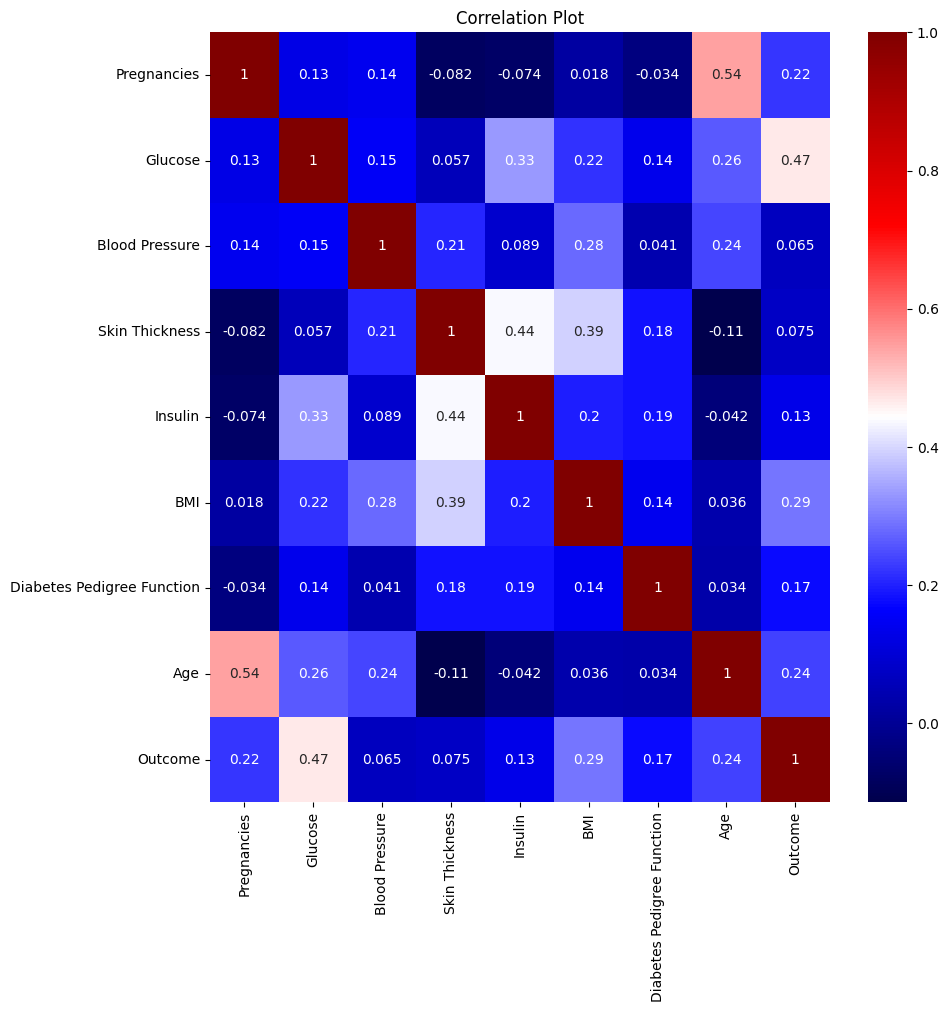

In [312]:
#Plotting The Heatmap

plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),annot=True,cmap="seismic")
plt.show()

In [313]:
#Finding The Variables Which Has The Highest Correlation With The Target Variable (Outcome)

corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                       1.000000
Glucose                       0.466581
BMI                           0.292695
Age                           0.238356
Pregnancies                   0.221898
Diabetes Pedigree Function    0.173844
Insulin                       0.130548
Skin Thickness                0.074752
Blood Pressure                0.065068
Name: Outcome, dtype: float64

In [314]:
#Categorizing The Data

x=data.drop(columns=["Outcome"],axis=1)
y=data.Outcome

In [315]:
#Splitting The Data Into Training Set And Test Set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [316]:
#Scaling The Data

scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [317]:
#Decision Tree Classifier

In [318]:
dtc=DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [319]:
y_pred1=dtc.predict(x_test)
print(y_pred1)

[0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0]


In [320]:
a1=accuracy_score(y_test,y_pred1)
p1=precision_score(y_test,y_pred1)
r1=recall_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)

In [321]:
print("Accuracy   :", a1)
print("Precision  :", p1)
print("Recall     :", r1)
print("F1-Score   :", f1)

Accuracy   : 0.7229437229437229
Precision  : 0.7575757575757576
Recall     : 0.30864197530864196
F1-Score   : 0.43859649122807015


In [322]:
#K-Nearest Neigbour Classifier

In [323]:
knnc=KNeighborsClassifier(n_neighbors=8)
knnc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [324]:
y_pred2=knnc.predict(x_test)
print(y_pred2)

[0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 0 1 0 1 1 0]


In [325]:
a2=accuracy_score(y_test,y_pred2)
p2=precision_score(y_test,y_pred2)
r2=recall_score(y_test,y_pred2)
f2=f1_score(y_test,y_pred2)

In [326]:
print("Accuracy   :", a2)
print("Precision  :", p2)
print("Recall     :", r2)
print("F1-Score   :", f2)

Accuracy   : 0.7272727272727273
Precision  : 0.6451612903225806
Recall     : 0.49382716049382713
F1-Score   : 0.5594405594405595


In [327]:
#Logistic Regression

In [328]:
logr=LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [329]:
y_pred3=logr.predict(x_test)
print(y_pred3)

[0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 0]


In [330]:
a3=accuracy_score(y_test,y_pred3)
p3=precision_score(y_test,y_pred3)
r3=recall_score(y_test,y_pred3)
f3=f1_score(y_test,y_pred3)

In [331]:
print("Accuracy   :", a3)
print("Precision  :", p3)
print("Recall     :", r3)
print("F1-Score   :", f3)

Accuracy   : 0.7532467532467533
Precision  : 0.6714285714285714
Recall     : 0.5802469135802469
F1-Score   : 0.6225165562913907


In [332]:
#Naive Bayes Algorithm

In [333]:
nbc=GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [334]:
y_pred4=nbc.predict(x_test)
print(y_pred4)

[0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 0]


In [335]:
a4=accuracy_score(y_test,y_pred4)
p4=precision_score(y_test,y_pred4)
r4=recall_score(y_test,y_pred4)
f4=f1_score(y_test,y_pred4)

In [336]:
print("Accuracy   :", a4)
print("Precision  :", p4)
print("Recall     :", r4)
print("F1-Score   :", f4)

Accuracy   : 0.7229437229437229
Precision  : 0.6103896103896104
Recall     : 0.5802469135802469
F1-Score   : 0.5949367088607596


In [337]:
#Neural Network Classifier

In [338]:
nnc=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
nnc.fit(x_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [339]:
y_pred5=nnc.predict(x_test)
print(y_pred5)

[0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1
 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 0]


In [340]:
a5=accuracy_score(y_test,y_pred5)
p5=precision_score(y_test,y_pred5)
r5=recall_score(y_test,y_pred5)
f5=f1_score(y_test,y_pred5)

In [341]:
print("Accuracy   :", a5)
print("Precision  :", p5)
print("Recall     :", r5)
print("F1-Score   :", f5)

Accuracy   : 0.658008658008658
Precision  : 0.5098039215686274
Recall     : 0.6419753086419753
F1-Score   : 0.5683060109289617


In [342]:
#Random Forest

In [343]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [344]:
y_pred6=rfc.predict(x_test)
print(y_pred6)

[0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1
 0 0 0 0 1 0 1 1 0]


In [345]:
a6=accuracy_score(y_test,y_pred6)
p6=precision_score(y_test,y_pred6)
r6=recall_score(y_test,y_pred6)
f6=f1_score(y_test,y_pred6)

In [346]:
print("Accuracy   :", a6)
print("Precision  :", p6)
print("Recall     :", r6)
print("F1-Score   :", f6)

Accuracy   : 0.7402597402597403
Precision  : 0.6438356164383562
Recall     : 0.5802469135802469
F1-Score   : 0.6103896103896104


In [347]:
#Support Vector Machine

In [348]:
svm=SVC(kernel="linear",decision_function_shape="ovo")
svm.fit(x_train,y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [349]:
y_pred7=svm.predict(x_test)
print(y_pred7)

[0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 0]


In [350]:
a7=accuracy_score(y_test,y_pred7)
p7=precision_score(y_test,y_pred7)
r7=recall_score(y_test,y_pred7)
f7=f1_score(y_test,y_pred7)

In [351]:
print("Accuracy   :", a7)
print("Precision  :", p7)
print("Recall     :", r7)
print("F1-Score   :", f7)

Accuracy   : 0.7489177489177489
Precision  : 0.6575342465753424
Recall     : 0.5925925925925926
F1-Score   : 0.6233766233766234


In [352]:
#XgBoost Classifier

In [353]:
xgc=GradientBoostingClassifier()
xgc.fit(x_train,y_train)

GradientBoostingClassifier()

In [354]:
y_pred8=xgc.predict(x_test)
print(y_pred8)

[0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1
 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0
 0 0 0 0 1 0 1 1 0]


In [355]:
a8=accuracy_score(y_test,y_pred8)
p8=precision_score(y_test,y_pred8)
r8=recall_score(y_test,y_pred8)
f8=f1_score(y_test,y_pred8)

In [356]:
print("Accuracy   :", a8)
print("Precision  :", p8)
print("Recall     :", r8)
print("F1-Score   :", f8)

Accuracy   : 0.70995670995671
Precision  : 0.5875
Recall     : 0.5802469135802469
F1-Score   : 0.5838509316770186


In [357]:
#Comparing Accuracy Values

Neural Network 0.658008658008658
XgBoost 0.70995670995671
Decision Tree 0.7229437229437229
Naive Bayes 0.7229437229437229
K-Nearest Neighbor 0.7272727272727273
Random Forest 0.7402597402597403
Support Vector Machine 0.7489177489177489
Logistic Regression 0.7532467532467533


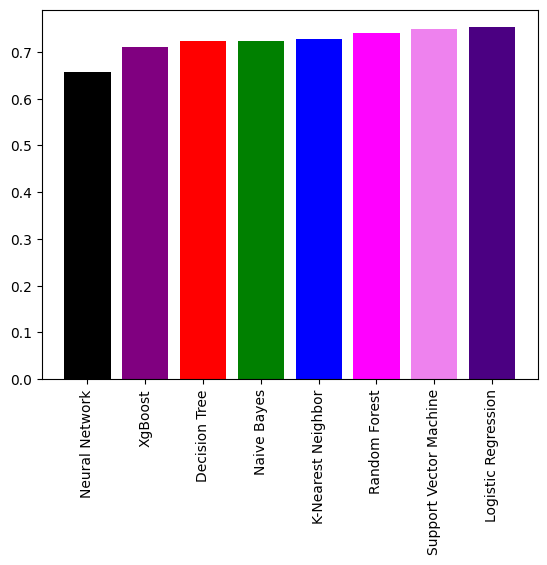

In [358]:
acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

sorted_models=sorted(acc_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

acc_keys,acc_values=zip(*sorted(zip(acc_models.keys(),acc_models.values()),key=lambda x:x[1]))

plt.bar(range(len(acc_models)),acc_values,tick_label=acc_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [359]:
#Comparing Precision Values

Neural Network 0.5098039215686274
XgBoost 0.5875
Naive Bayes 0.6103896103896104
Random Forest 0.6438356164383562
K-Nearest Neighbor 0.6451612903225806
Support Vector Machine 0.6575342465753424
Logistic Regression 0.6714285714285714
Decision Tree 0.7575757575757576


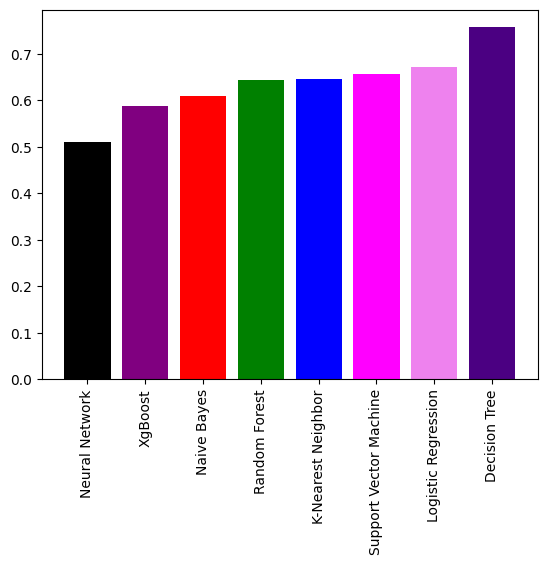

In [360]:
pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

sorted_models=sorted(pre_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

pre_keys,pre_values=zip(*sorted(zip(pre_models.keys(),pre_models.values()),key=lambda x:x[1]))

plt.bar(range(len(pre_models)),pre_values,tick_label=pre_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [361]:
#Comparing Recall Values

Decision Tree 0.30864197530864196
K-Nearest Neighbor 0.49382716049382713
Logistic Regression 0.5802469135802469
Naive Bayes 0.5802469135802469
Random Forest 0.5802469135802469
XgBoost 0.5802469135802469
Support Vector Machine 0.5925925925925926
Neural Network 0.6419753086419753


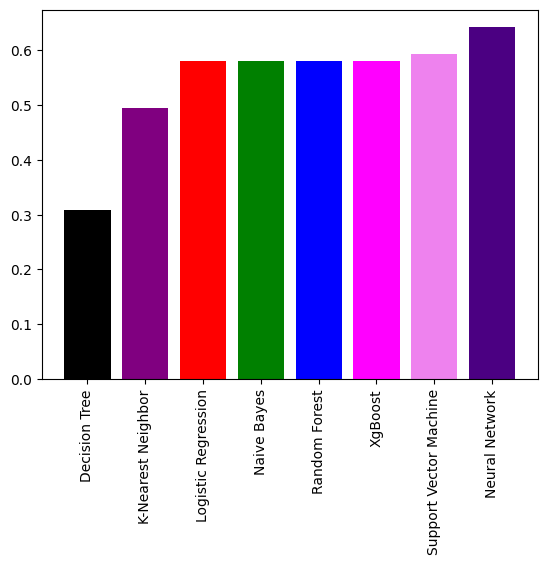

In [362]:
rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

sorted_models=sorted(rec_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

rec_keys,rec_values=zip(*sorted(zip(rec_models.keys(),rec_models.values()),key=lambda x:x[1]))

plt.bar(range(len(rec_models)),rec_values,tick_label=rec_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [363]:
#Comparing F1-Score

Decision Tree 0.43859649122807015
K-Nearest Neighbor 0.5594405594405595
Neural Network 0.5683060109289617
XgBoost 0.5838509316770186
Naive Bayes 0.5949367088607596
Random Forest 0.6103896103896104
Logistic Regression 0.6225165562913907
Support Vector Machine 0.6233766233766234


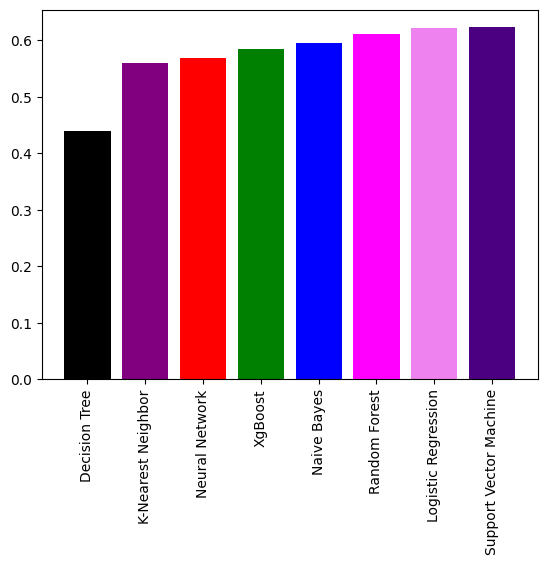

In [364]:
f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

sorted_models=sorted(f1_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

f1_keys,f1_values=zip(*sorted(zip(f1_models.keys(),f1_models.values()),key=lambda x:x[1]))

plt.bar(range(len(f1_models)),f1_values,tick_label=f1_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [365]:
#Plotting All Accuracy,Precision,Recall And F1-Score Of All The Models

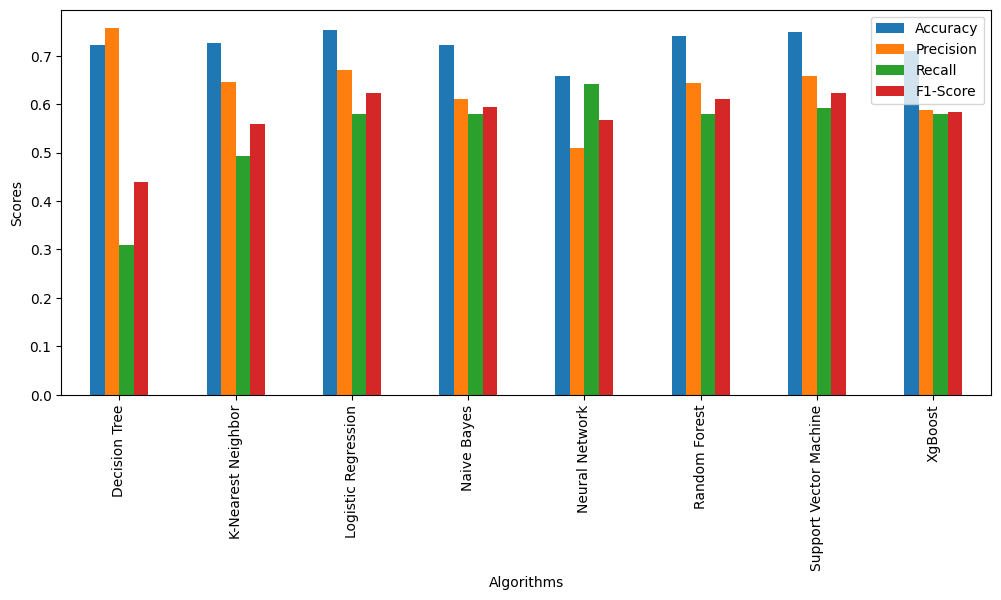

In [366]:
models_data=pd.DataFrame([["Decision Tree",a1,p1,r1,f1],["K-Nearest Neighbor",a2,p2,r2,f2],["Logistic Regression",a3,p3,r3,f3],["Naive Bayes",a4,p4,r4,f4],["Neural Network",a5,p5,r5,f5],["Random Forest",a6,p6,r6,f6],["Support Vector Machine",a7,p7,r7,f7],["XgBoost",a8,p8,r8,f8]],columns=["Scores","Accuracy","Precision","Recall","F1-Score"])
models_data.plot(x="Scores",kind="bar",stacked=False,xlabel="Algorithms",ylabel="Scores",figsize=(12,5))
plt.show()

In [367]:
#Saving The Trained Model

import pickle

filename="Diabetes.sav"
pickle.dump(logr,open(filename,"wb"))

filename="Diabetes_Scale.sav"
pickle.dump(scale,open(filename,"wb"))

In [368]:
#Loading The Saved Model

loaded_model=pickle.load(open("Diabetes.sav","rb"))
loaded_model=pickle.load(open("Diabetes_Scale.sav","rb"))